In [1]:
####Geopy instructions are located at https://pypi.python.org/pypi/geopy ####
####DBSCAN instructions are located at 
import numpy as np
import pandas as pd
import geopy
import numpy as np
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
from pylab import *
from numpy import random
import pdb


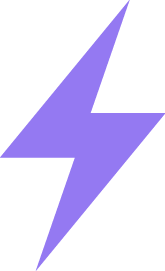

Running local mode, some functionality limited.



In [2]:
##### First Install Lightning using the "pip install lightning-python" Command on the C:\> Command line #######
from lightning import Lightning
lgn = Lightning(ipython=True, local=True)

In [3]:
def dbscanner(x, y, a, b):
    from sklearn.cluster import DBSCAN
    dbscan = DBSCAN(eps = a, min_samples = b)
    dbscan.fit(X)
    labels = dbscan.labels_
    n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
    print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))
    print('Estimated number of clusters: %d' % n_clusters_)
    print("Homogeneity: %0.3f" % metrics.homogeneity_score(y, labels))
    print("Completeness: %0.3f" % metrics.completeness_score(y, labels))
    print("V-measure: %0.3f" % metrics.v_measure_score(y, labels))
    import numpy as np
    core_samples = np.zeros_like(labels, dtype = bool)  
    core_samples[dbscan.core_sample_indices_] = True 
    print(core_samples)
    unique_labels = np.unique(labels)
    colors = plt.cm.Spectral(np.linspace(0,1, len(unique_labels)))
    fig = matplotlib.pyplot.gcf()
    fig.set_size_inches(18.5, 10.5)

    for (label, color) in zip(unique_labels, colors):
        class_member_mask = (labels == label)
        n = X.loc[class_member_mask & core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 10)

        n = X.loc[class_member_mask & ~core_samples, :]
        plt.plot(n.iloc[:,0],n.iloc[:,1], 'o', markerfacecolor = color, markersize = 5)

    plt.show()

In [4]:
# Data from https://github.com/uniVocity/worldcities-import
# Alternate link: https://www.maxmind.com/en/free-world-cities-database?pkit_lang=en
df = pd.read_csv('worldcitiespop.txt', sep = ',')

/home/matthew/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

Country        City  AccentCity Region  Population   Latitude  Longitude
0      ad       aixas       Aix�s      6         NaN  42.483333   1.466667
1      ad  aixirivali  Aixirivali      6         NaN  42.466667   1.500000
2      ad  aixirivall  Aixirivall      6         NaN  42.466667   1.500000
3      ad   aixirvall   Aixirvall      6         NaN  42.466667   1.500000
4      ad    aixovall    Aixovall      6         NaN  42.466667   1.483333

In [6]:
df['Country'].value_counts()

cn    238985
ru    215938
id    176546
us    141989
ir    123872
pk     94247
af     88749
tr     72451
de     70477
fr     66362
mx     62116
th     56846
pl     49666
ph     48233
kr     44601
ng     43763
br     43204
ua     42775
in     39813
mm     33856
vn     32943
es     31496
kp     29358
ro     28838
ma     28356
se     27813
co     27326
pe     26549
bd     26414
my     26313
       ...  
ck        56
je        53
im        45
li        42
ai        42
wf        39
mv        29
bm        22
vi        22
vg        22
tc        21
sc        21
sj        19
mo        18
sh        16
nu        16
tv        14
nr        13
sm         8
gi         8
mc         7
cx         6
mh         6
pm         3
gs         2
nf         1
tk         1
cc         1
pn         1
tf         1
Name: Country, Length: 234, dtype: int64

In [7]:
df['Population'].isnull().sum()

3125978

In [8]:
df.shape

(3173958, 7)

In [9]:
df = df.dropna()

In [10]:
df.head()

Country              City        AccentCity Region  Population   Latitude  \
6       ad  andorra la vella  Andorra la Vella      7     20430.0  42.500000   
20      ad           canillo           Canillo      2      3292.0  42.566667   
32      ad            encamp            Encamp      3     11224.0  42.533333   
49      ad        la massana        La Massana      4      7211.0  42.550000   
53      ad      les escaldes      Les Escaldes      8     15854.0  42.500000   

    Longitude  
6    1.516667  
20   1.600000  
32   1.583333  
49   1.516667  
53   1.533333

# United States

In [11]:
usa = df[df['Country'] == 'us']
X = usa[['Longitude','Latitude']]
y = usa['Latitude']
x = usa['Longitude']
labels = usa['City']
usa.head()

Country            City      AccentCity Region  Population   Latitude  \
2907755      us       alabaster       Alabaster     AL     26738.0  33.244167   
2907759      us     albertville     Albertville     AL     18368.0  34.267500   
2907765      us  alexander city  Alexander City     AL     14993.0  32.943889   
2907804      us        anniston        Anniston     AL     23423.0  33.659722   
2907848      us          athens          Athens     AL     20470.0  34.802778   

         Longitude  
2907755 -86.816389  
2907759 -86.208889  
2907765 -85.953889  
2907804 -85.831667  
2907848 -86.971667

In [26]:
usa.sort_values('Population', ascending = False)

Country            City      AccentCity Region  Population   Latitude  \
2990572      us        new york        New York     NY   8107916.0  40.714167   
2920652      us     los angeles     Los Angeles     CA   3877129.0  34.052222   
2938450      us         chicago         Chicago     IL   2841952.0  41.850000   
3027895      us         houston         Houston     TX   2027712.0  29.763056   
3012213      us    philadelphia    Philadelphia     PA   1453268.0  39.952222   
2913986      us         phoenix         Phoenix     AZ   1428509.0  33.448333   
2922103      us       san diego       San Diego     CA   1287050.0  32.715278   
3030034      us     san antonio     San Antonio     TX   1256810.0  29.423889   
3026766      us          dallas          Dallas     TX   1211704.0  32.783333   
2922119      us        san jose        San Jose     CA    897460.0  37.339444   
2967770      us         detroit         Detroit     MI    884941.0  42.331389   
2928850      us    jacksonville    Jacksonville     FL    797557.0  30.331944   
2942842      us    indianapolis    Indianapolis     IN    773283.0  39.768333   
2999186      us        columbus        Columbus     OH    736836.0  39.961111   
2922109      us   san francisco   San Francisco     CA    732072.0  37.775000   
3025768      us          austin          Austin     TX    678368.0  30.266944   
3023543      us         memphis         Memphis     TN    641608.0  35.149444   
3027325      us      fort worth      Fort Worth     TX    618119.0  32.725278   
2957964      us       baltimore       Baltimore     MD    610892.0  39.290278   
2993640      us       charlotte       Charlotte     NC    598351.0  35.226944   
3027061      us         el paso         El Paso     TX    597181.0  31.758611   
3048190      us       milwaukee       Milwaukee     WI    579180.0  43.038889   
2965101      us          boston          Boston     MA    571281.0  42.358333   
3042800      us         seattle         Seattle     WA    569369.0  47.606389   
2923644      us          denver          Denver     CO    555981.0  39.739167   
2927451      us      washington      Washington     DC    552433.0  38.895000   
3005912      us        portland        Portland     OR    540513.0  45.523611   
2981987      us       las vegas       Las Vegas     NV    540111.0  36.175000   
3004353      us   oklahoma city   Oklahoma City     OK    532950.0  35.467500   
3023757      us       nashville       Nashville     TN    530852.0  36.165833   
...         ...             ...             ...    ...         ...        ...   
3015518      us           loiza           Loiza     PR      4311.0  18.433333   
3015666      us        patillas        Patillas     PR      4247.0  18.008333   
3014969      us           camuy           Camuy     PR      4240.0  18.485833   
2997740      us         grafton         Grafton     ND      4148.0  48.412222   
2912546      us        soldotna        Soldotna     AK      4136.0  60.487778   
3014854      us          aguada          Aguada     PR      4040.0  18.381389   
2979332      us          dillon          Dillon     MT      3964.0  45.216389   
3041588      us       esperance       Esperance     WA      3833.0  47.789167   
3015406      us          jayuya          Jayuya     PR      3587.0  18.220556   
2912416      us            nome            Nome     AK      3485.0  64.501111   
3015016      us          ciales          Ciales     PR      3256.0  18.338056   
2960713      us      hillandale      Hillandale     MD      3239.0  39.026389   
3014901      us    barranquitas    Barranquitas     PR      3021.0  18.188611   
3015605      us         morovis         Morovis     PR      2414.0  18.327778   
3015579      us         maunabo         Maunabo     PR      2154.0  18.009167   
2933450      us  lithia springs  Lithia Springs     GA      2012.0  33.793889   
3015614      us       naranjito       Naranjito     PR      2005.0  18.302778   
3015868      us        toa baja        

In [12]:
lgn.scatter(x, y, labels = usa['City'])

Silhouette Coefficient: 0.270
Estimated number of clusters: 6
Homogeneity: 0.019
Completeness: 1.000
V-measure: 0.037
[ True  True  True ...,  True  True  True]


/home/matthew/anaconda2/lib/python2.7/site-packages/matplotlib/lines.py:1206: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  if self._markerfacecolor != fc:


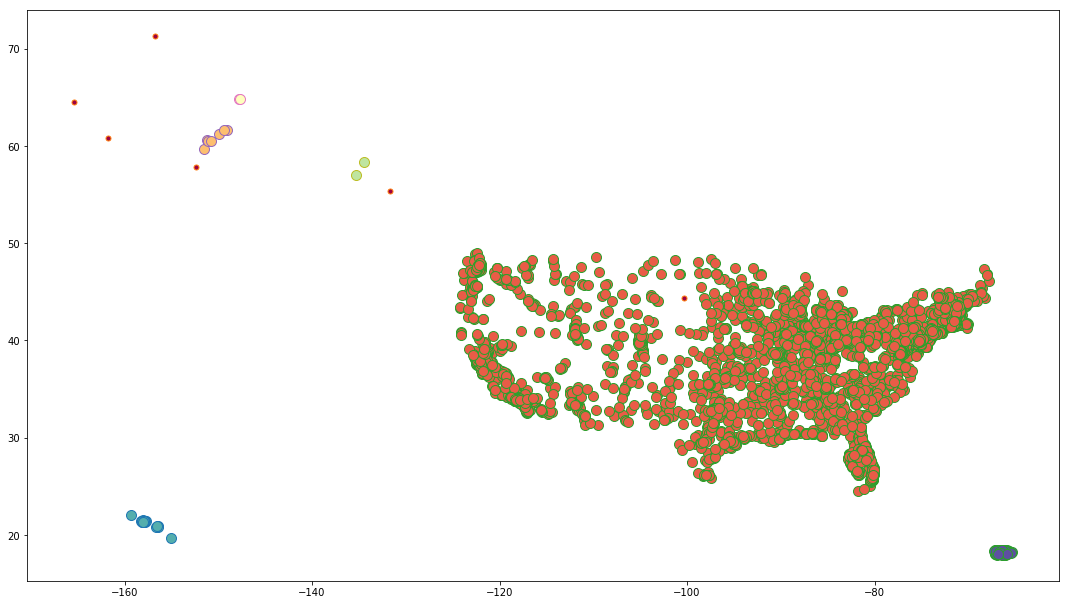

In [13]:
dbscanner(x, y, 2, 2)

# Canada

In [14]:
canada = df[df['Country'] == 'ca']
X = canada[['Longitude','Latitude']]
y = canada['Latitude']
x = canada['Longitude']
labels = canada['City']

In [15]:
lgn.scatter(x, y, labels = canada['City'])

Silhouette Coefficient: 0.659
Estimated number of clusters: 3
Homogeneity: 0.121
Completeness: 0.931
V-measure: 0.214
[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True

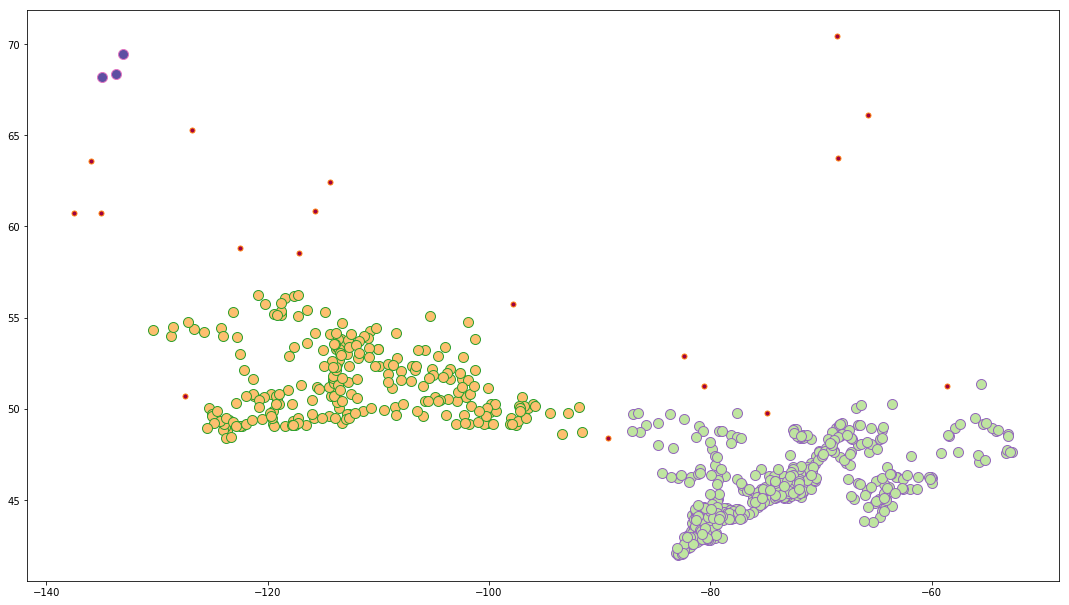

In [16]:
dbscanner(x, y, 2, 2)

# Mexico

In [17]:
canada = df[df['Country'] == 'mx']
X = canada[['Latitude','Longitude']]
y = canada['Latitude']
x = canada['Longitude']
labels = canada['City']

In [18]:
lgn.scatter(x, y, labels = canada['City'])

In [19]:
dbscanner(x, y, 2, 2)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

# Whole World

In [21]:
X = df[['Latitude','Longitude']]
y = df['Latitude']
x = df['Longitude']
labels = df['City']

In [22]:
lgn.scatter(x, y, labels = df['City'])

# Million people cities

In [27]:
million = df[df['Population'] > 500000]

In [28]:
X = million[['Longitude','Latitude']]
x = million['Longitude']
y = million['Latitude']

In [29]:
lgn.scatter(x, y, labels = million['City'])

Silhouette Coefficient: 0.072
Estimated number of clusters: 94
Homogeneity: 0.531
Completeness: 0.996
V-measure: 0.693
[ True  True  True False  True False False  True False  True False False
 False False False  True  True False False False False False  True  True
  True  True False False  True False False False  True  True  True False
  True False False  True False  True  True  True  True  True False  True
  True  True False  True  True  True False  True  True  True  True False
  True  True False False False False False  True False False False  True
  True False  True False False False False  True False False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True False  True  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True False  True  True  True  True  True
 False False  True  True  True  True  True  True  True  True  True  True
 Fals

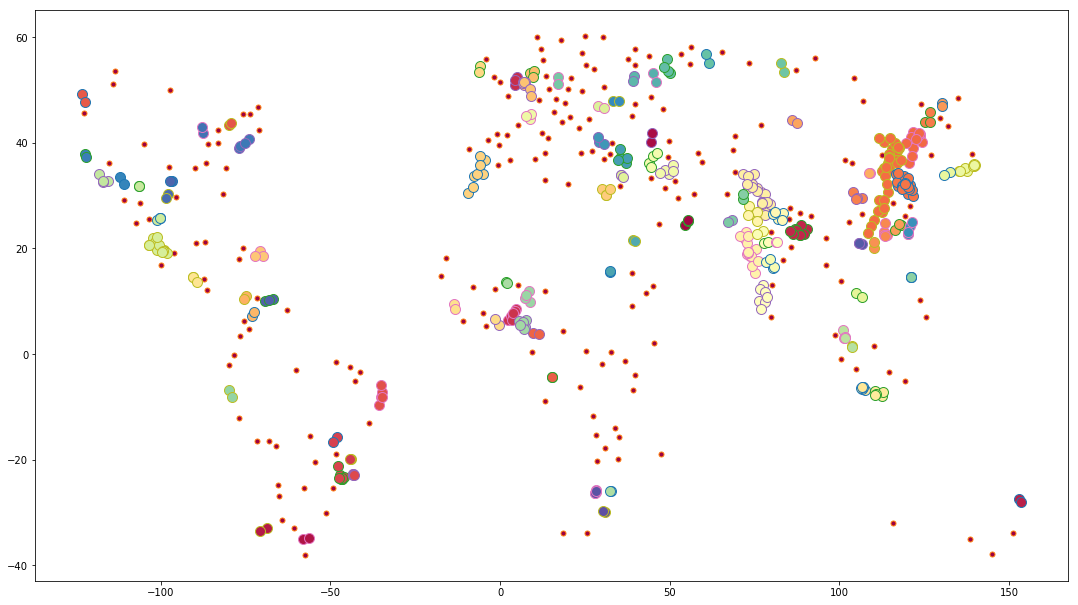

In [30]:
dbscanner(x, y, 2, 2)

Silhouette Coefficient: 0.268
Estimated number of clusters: 63
Homogeneity: 0.504
Completeness: 0.997
V-measure: 0.669
[ True  True  True  True  True False  True  True  True  True  True  True
  True  True False  True  True False False False  True  True  True  True
  True  True  True  True  True  True  True False  True  True  True False
  True False  True  True  True  True  True  True  True  True False  True
  True  True False  True  True  True False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True False  True False False  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  Tru

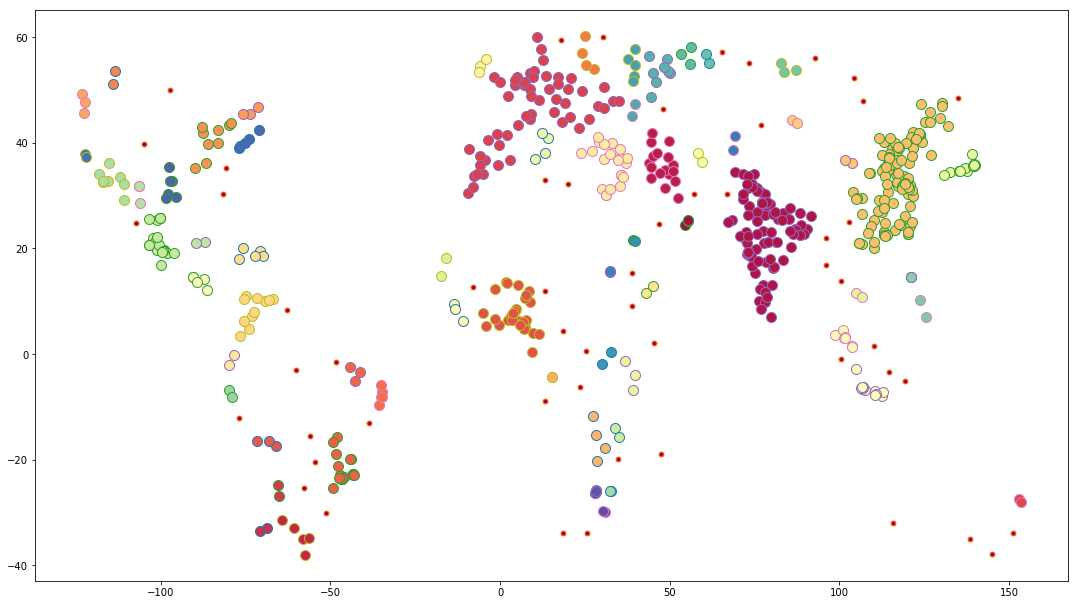

In [31]:
dbscanner(x, y, 4, 2)

# 200,000 people

In [32]:
million = df[df['Population'] > 200000]

In [33]:
X = million[['Longitude','Latitude']]
x = million['Longitude']
y = million['Latitude']

In [34]:
lgn.scatter(x, y, labels = million['City'])

Silhouette Coefficient: 0.154
Estimated number of clusters: 166
Homogeneity: 0.544
Completeness: 0.993
V-measure: 0.703
[ True  True  True ...,  True  True  True]


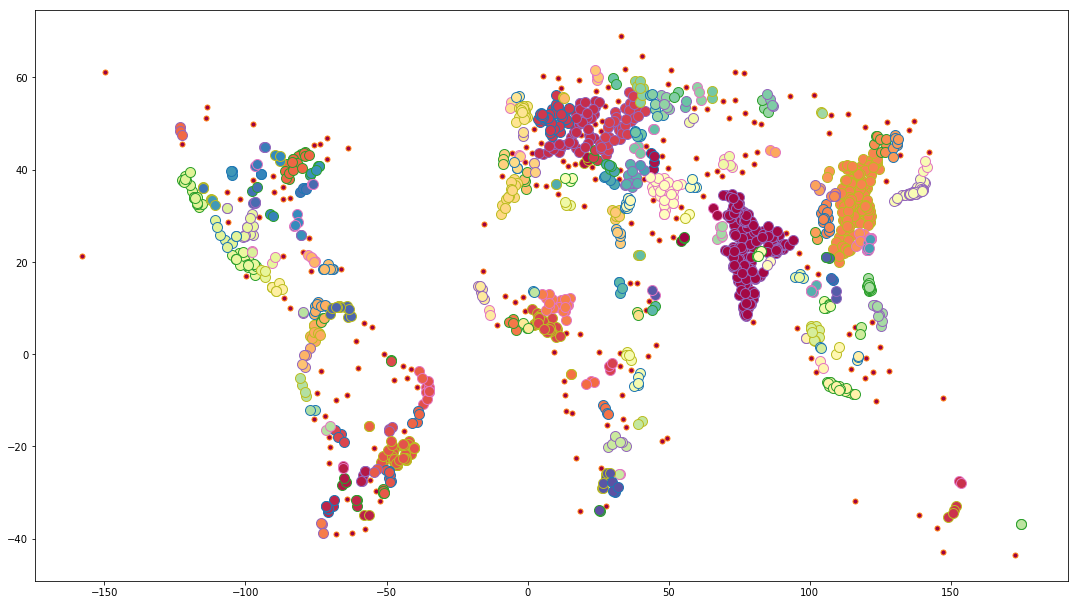

In [35]:
dbscanner(x, y, 2, 2)